In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
relative_path = 'src\diabetes.csv'
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, 'r') as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)
print('Dataset shape:')
print(df.shape)
df.isnull().sum()
print('\nFrequency of each label value:')
print(df.Diabetes_012.value_counts())
print('\nDistribution of the target:')
print(df.Diabetes_012.value_counts(normalize=1))
print('\nFeatures:')
print(df.columns)
df.Diabetes_012.replace(2.0, 1.0, inplace=True)

Dataset shape:
(253680, 22)

Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


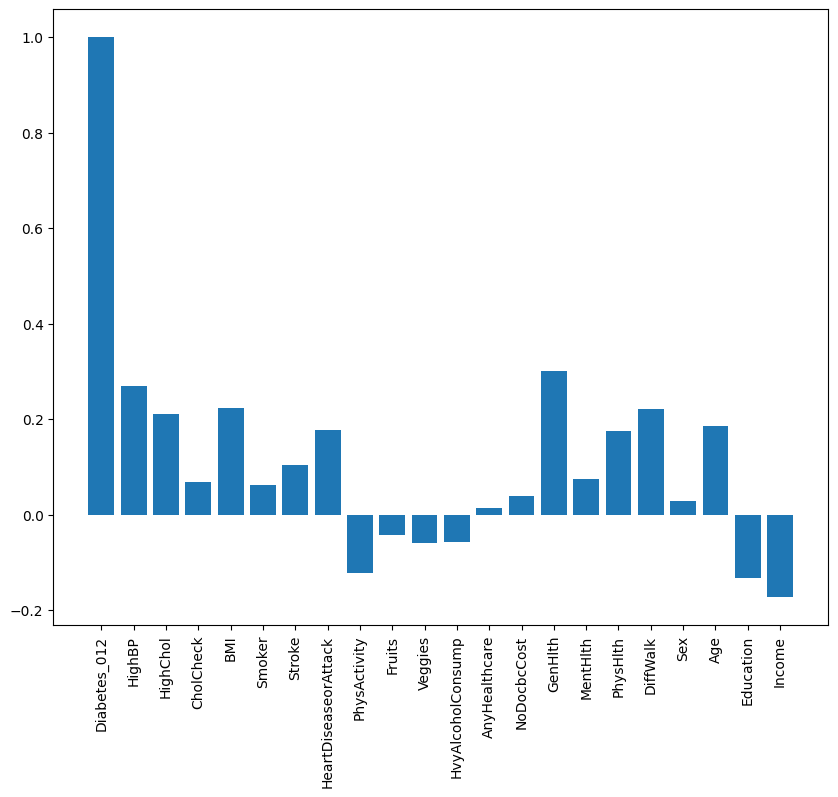

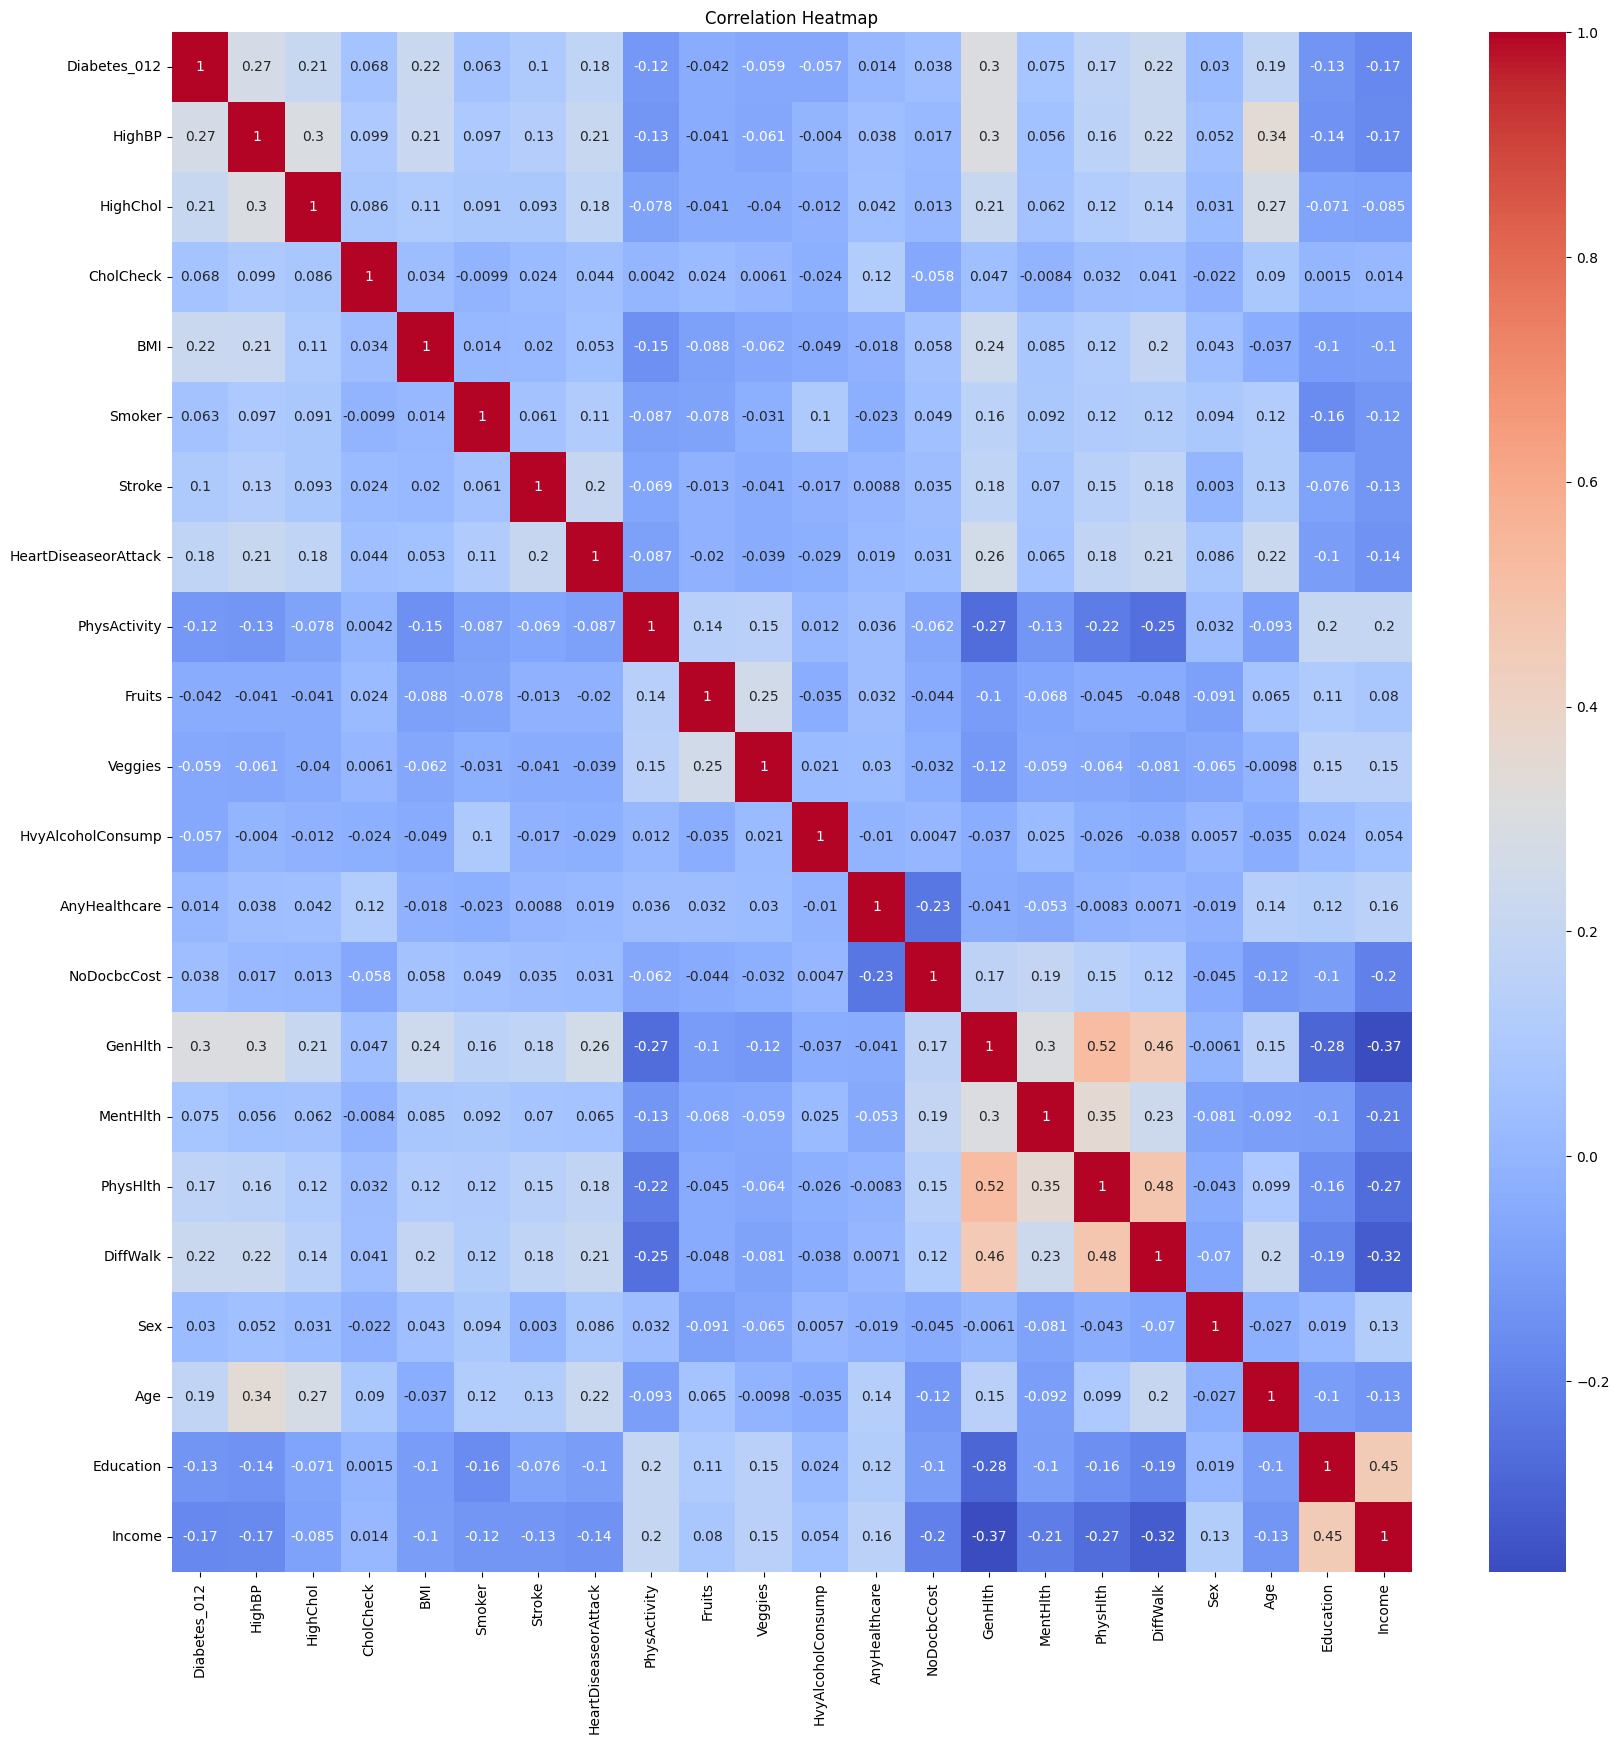

In [3]:
# Correlation

plt.figure(figsize=(10, 8))
df.corr("pearson")["Diabetes_012"]
fig2 = plt.bar(
    df.corr("pearson")["Diabetes_012"].index, df.corr("pearson")["Diabetes_012"]
)
plt.xticks(rotation=90)

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[df.columns].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Heatmap")
plt.show()

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(253680, 19)
Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


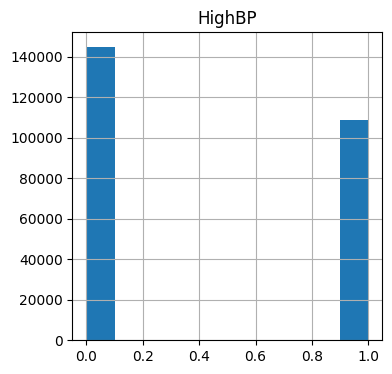

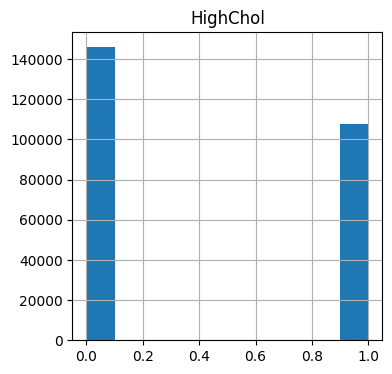

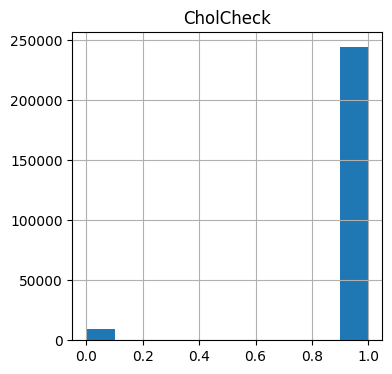

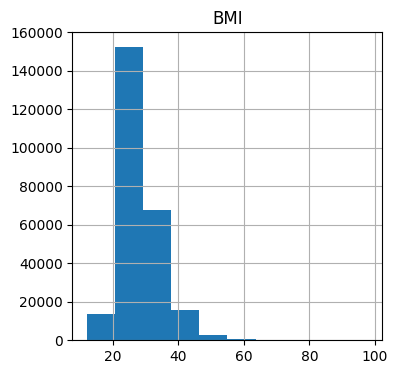

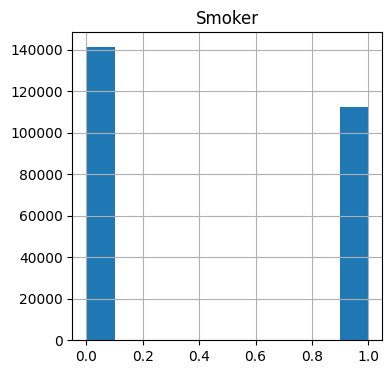

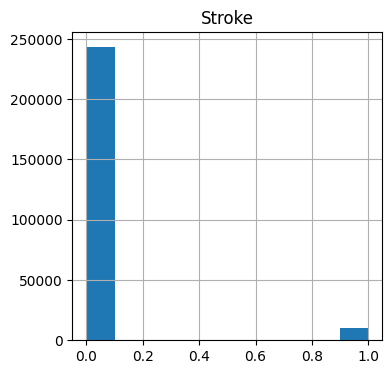

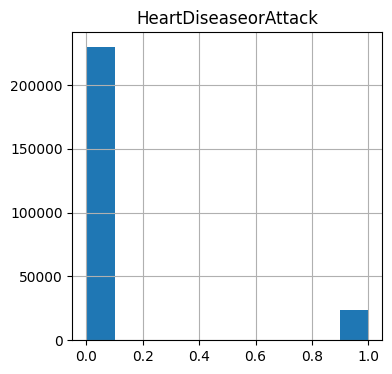

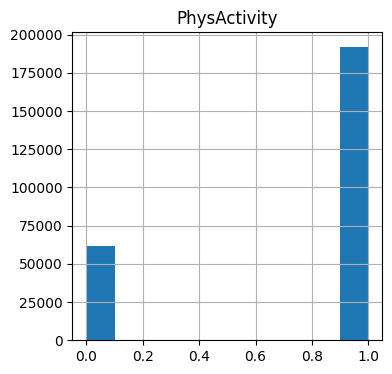

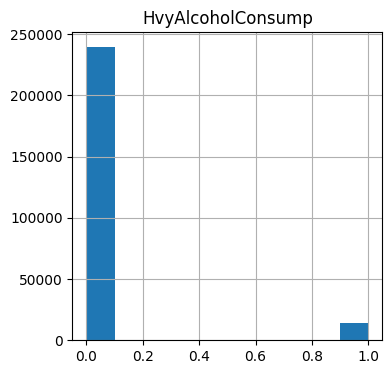

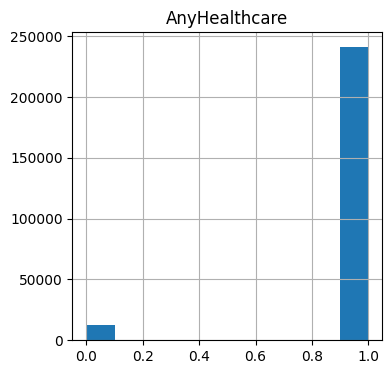

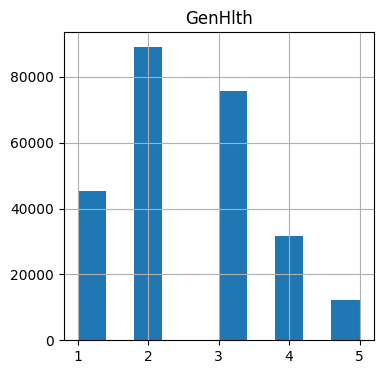

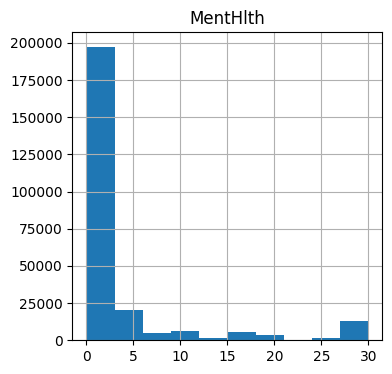

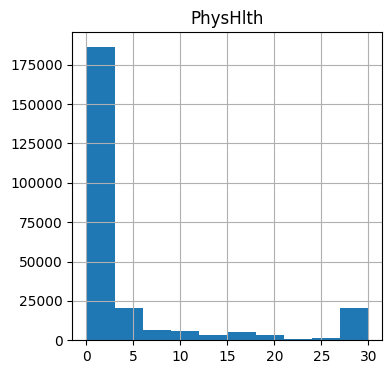

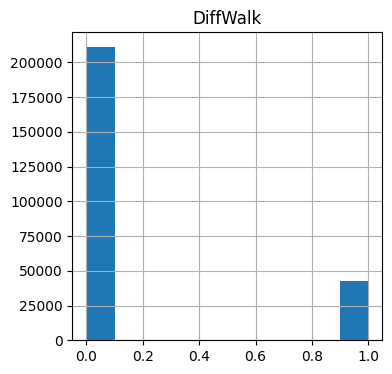

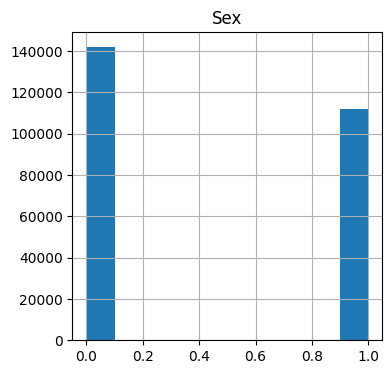

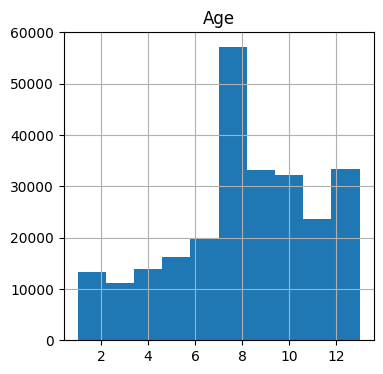

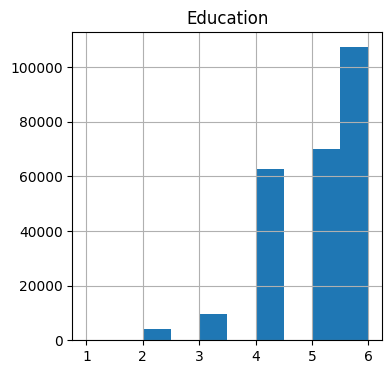

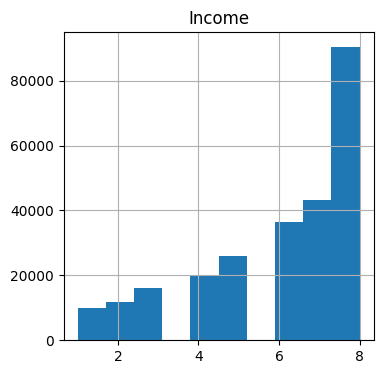

In [4]:
# Drop features with weak correlation

print(df.columns)
df.columns = df.columns.str.replace(" ", "")
df.drop(["Fruits", "Veggies", "NoDocbcCost"], axis=1, inplace=True)
print(df.shape)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(y.value_counts())

for c in X.columns:
    hist = X.hist(column=c, figsize=(4, 4))

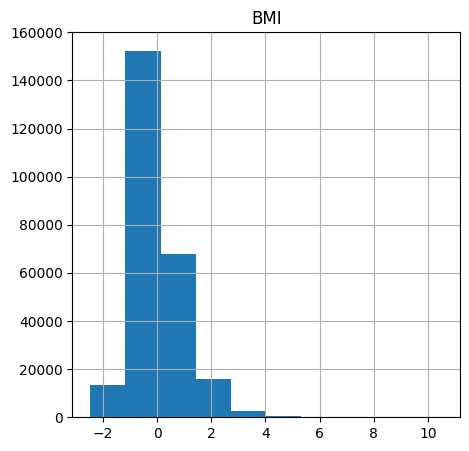

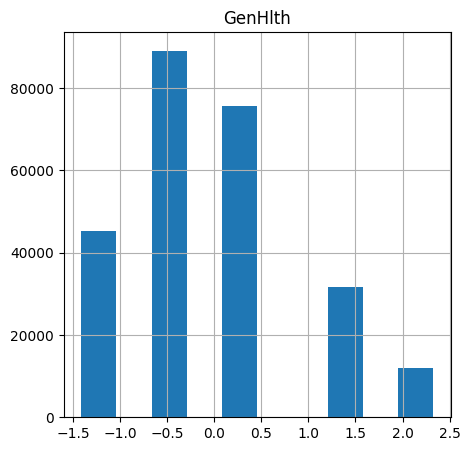

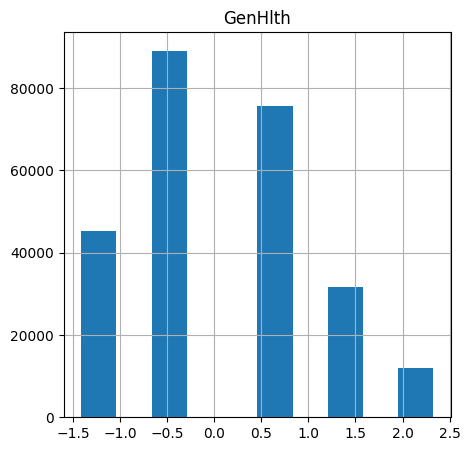

In [6]:
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(X[cols_to_scale])
X.loc[:, cols_to_scale] = bmi_scaler.transform(X[cols_to_scale])
fig = X.hist(column="BMI", figsize=(5, 5))


X.hist(column="GenHlth", figsize=(5, 5))
gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = gh_scaler.transform(X[cols_to_scale])
X.hist(column="GenHlth", figsize=(5, 5))

import warnings
warnings.filterwarnings("ignore")

array([[<Axes: title={'center': 'MentHlth'}>]], dtype=object)

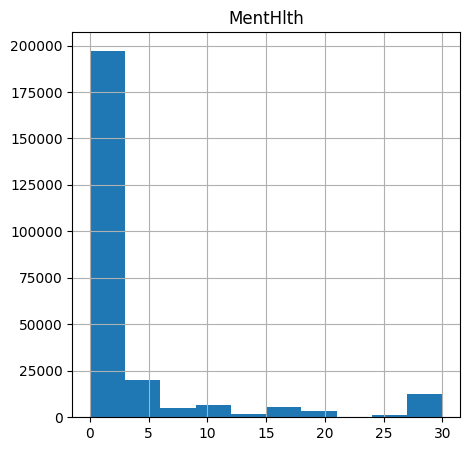

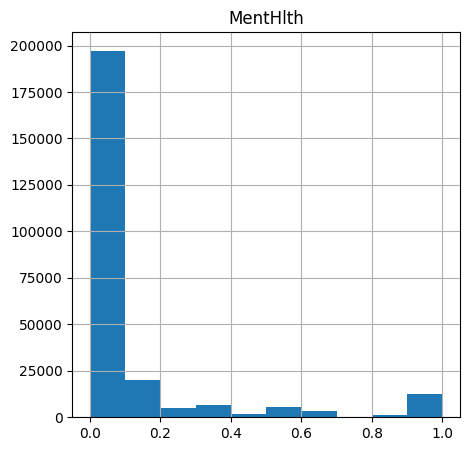

In [7]:

X.hist(column="MentHlth", figsize=(5, 5))
ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = ment_scaler.transform(X[cols_to_scale])
X.hist(column="MentHlth", figsize=(5, 5))

array([[<Axes: title={'center': 'PhysHlth'}>]], dtype=object)

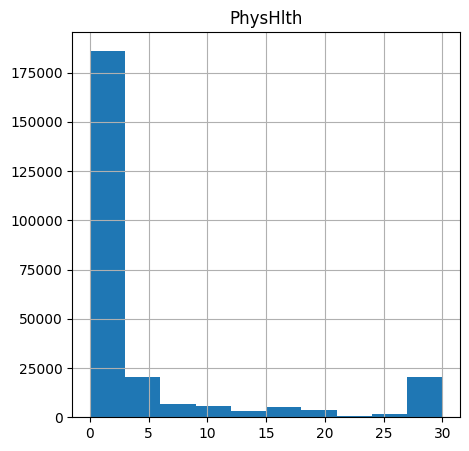

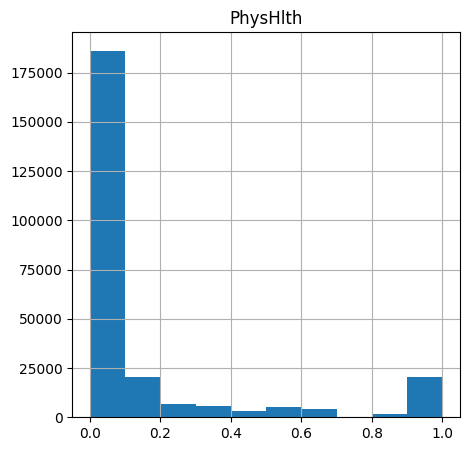

In [8]:
X.hist(column="PhysHlth", figsize=(5, 5))
phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = phys_scaler.transform(X[cols_to_scale])
X.hist(column="PhysHlth", figsize=(5, 5))

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

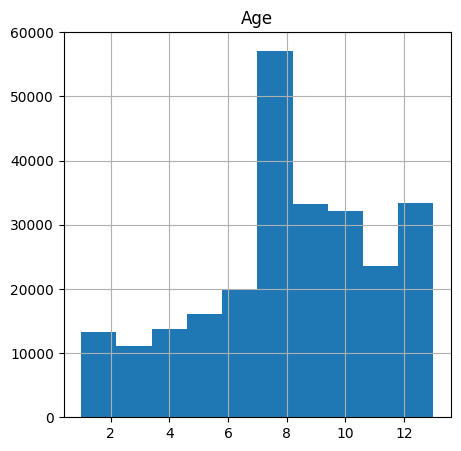

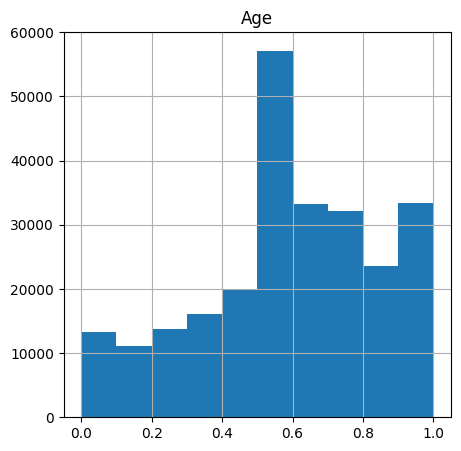

In [9]:
X.hist(column="Age", figsize=(5, 5))
age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = age_scaler.transform(X[cols_to_scale])
X.hist(column="Age", figsize=(5, 5))

array([[<Axes: title={'center': 'Education'}>]], dtype=object)

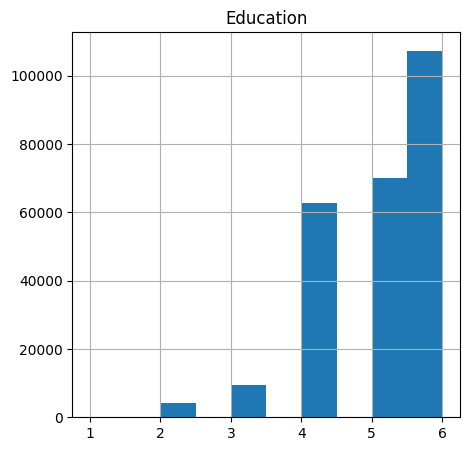

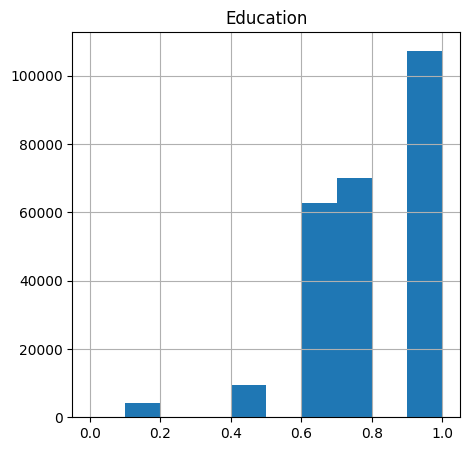

In [10]:
X.hist(column="Education", figsize=(5, 5))
edu_scaler = MinMaxScaler()
cols_to_scale = ["Education"]
edu_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = edu_scaler.transform(X[cols_to_scale])
X.hist(column="Education", figsize=(5, 5))

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

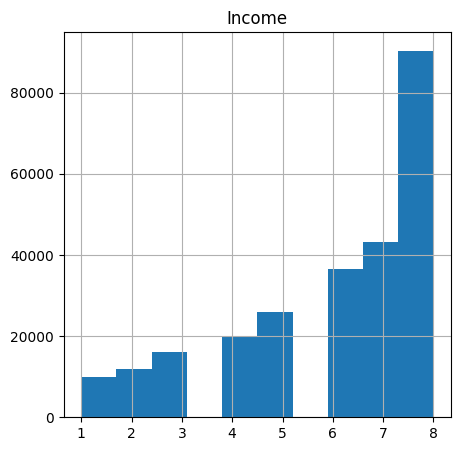

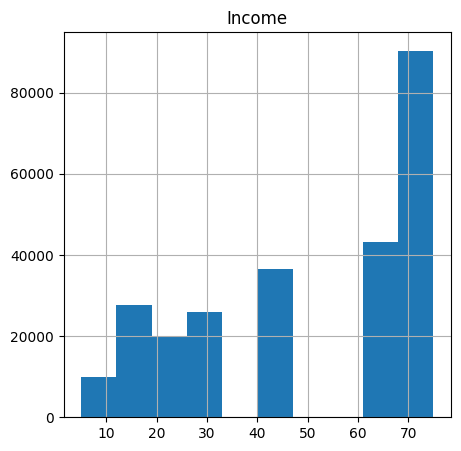

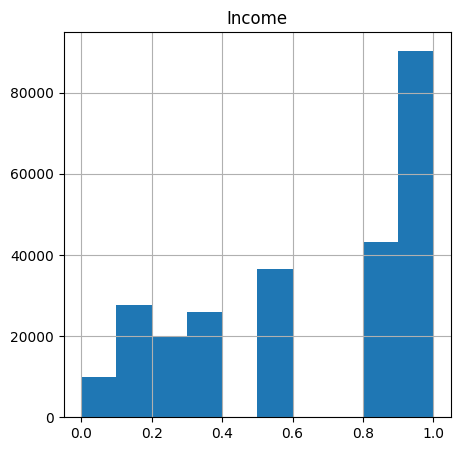

In [11]:
X.hist(column="Income", figsize=(5, 5))
income_cat_to_avg_map = {
    1: 5,
    2: 12.5,
    3: 17.5,
    4: 22.5,
    5: 30.0,
    6: 42.5,
    7: 62.5,
    8: 75,
}
X = X.assign(Income=X.Income.map(income_cat_to_avg_map))
X.hist(column="Income", figsize=(5, 5))
inc_scaler = MinMaxScaler()
cols_to_scale = ["Income"]
inc_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = inc_scaler.transform(X[cols_to_scale])
X.hist(column="Income", figsize=(5, 5))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1
)
# pd.Series(y_test).value_counts().plot(kind="bar")
smt = SMOTETomek(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [14]:
print(pd.Series(y_train).value_counts())  # tomlink=134888 Smote=136796
X_train.shape[0] + X_test.shape[0] + X_val.shape[0]  # tomlink=361101 smote=364917

Diabetes_012
0.0    134784
1.0    134784
Name: count, dtype: int64


360893

In [25]:
# Random Forest

a = 100
mf = range(16, 18)
md = range(18, 25)
best = (0, None, (0, 0, 0))

for b in mf:
        for c in md:
            print(f"n_estimators={a}, max_features={b}, max_depth={c}")
            rf = RandomForestClassifier(
                n_estimators=a, max_features=b, max_depth=c
            )
            rf.fit(X_train, y_train)
            train_score = rf.score(X_train, y_train)
            val_score = rf.score(X_val, y_val)
            if best[0] < val_score:
                best = (val_score, rf, (a, b, c))
            print(f'Train score={train_score} ///  Validation score={val_score}')
            

    
print(best)

n_estimators=100, max_features=16, max_depth=18
Train score=0.9400411028015194 ///  Validation score=0.8334277759984232
n_estimators=100, max_features=16, max_depth=19
Train score=0.9497010030864198 ///  Validation score=0.832737933922984
n_estimators=100, max_features=16, max_depth=20
Train score=0.9586486526590693 ///  Validation score=0.8318017196777452
n_estimators=100, max_features=16, max_depth=21
Train score=0.9670917913105413 ///  Validation score=0.8311118776023061
n_estimators=100, max_features=16, max_depth=22
Train score=0.9738247863247863 ///  Validation score=0.8301510261400872
n_estimators=100, max_features=16, max_depth=23
Train score=0.9798937559354226 ///  Validation score=0.8292887235457883
n_estimators=100, max_features=16, max_depth=24
Train score=0.9843712903608737 ///  Validation score=0.8273916578383306
n_estimators=100, max_features=17, max_depth=18
Train score=0.9391099833808167 ///  Validation score=0.8322451895833847
n_estimators=100, max_features=17, max_de

In [29]:
# Test Data Prediction

rf = RandomForestClassifier(n_estimators=100, max_features=16, max_depth=18)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
y_pred = rf.predict(X)
conf_mat = confusion_matrix(y, y_pred, normalize='true')
print(train_score)
print(test_score)

0.9397109449192782
0.8341217281614632


The accuracy of prediction on the whole imbalanced binary dataset:0.5848938909312912

The confusion matrix:

[[0.93760031 0.06239969]
 [0.44880806 0.55119194]]


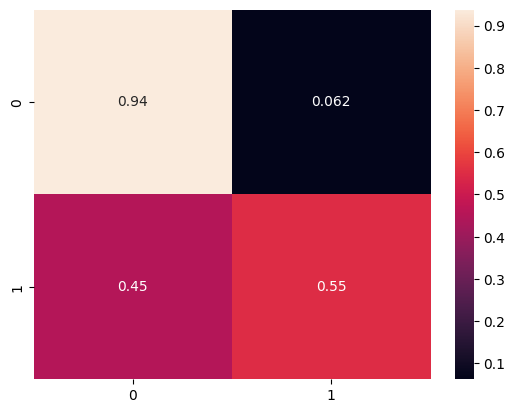

In [33]:
#Predicting labels on the whole dataset
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


std_scaler = StandardScaler()
cols_to_scale = ['BMI','GenHlth']
std_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = std_scaler.transform(X[cols_to_scale])


income_cat_to_avg_map = {1:5,2:12.5,3:17.5,4:22.5,5:30.0,6:42.5,7:62.5,8:75}
X = X.assign(Income = X.Income.map(income_cat_to_avg_map))


n_scaler = MinMaxScaler()
cols_to_scale = ['Income', 'Age', 'Education','PhysHlth','MentHlth']
n_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = n_scaler.transform(X[cols_to_scale])



y_pred = rf.predict(X)
print(f'The accuracy of prediction on the whole imbalanced binary dataset:{f1_score(y,y_pred)}\n')
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [43]:

importances = rf.feature_importances_
print(importances)
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income']
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
print(sorted_feature_names)

[0.18408016 0.01515316 0.00119987 0.122528   0.00804837 0.00375843
 0.0059778  0.00694943 0.00373277 0.00282328 0.11652818 0.0209197
 0.0449218  0.00541683 0.00907008 0.33675807 0.0650161  0.04711798]
['Age', 'HighBP', 'BMI', 'GenHlth', 'Education', 'Income', 'PhysHlth', 'MentHlth', 'HighChol', 'Sex', 'Smoker', 'PhysActivity', 'HeartDiseaseorAttack', 'DiffWalk', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck']


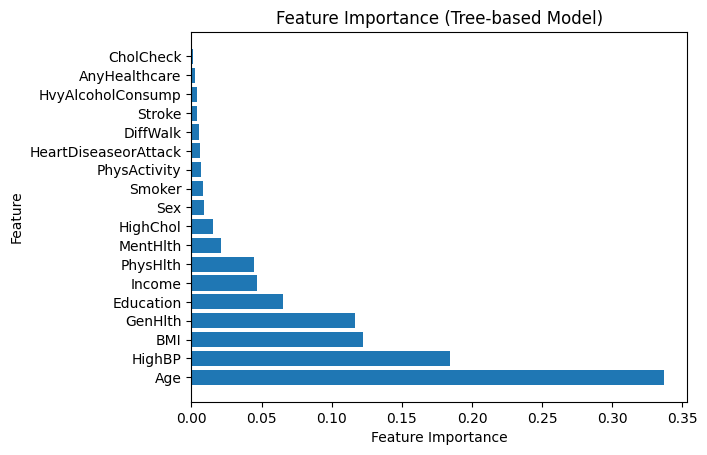

In [45]:
plt.barh(sorted_feature_names, importances[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Tree-based Model)")
plt.show()

NOW DROP MORE FEATURES WHICH SEEM LESS RELEVENT

TRUE START

In [3]:
relative_path = 'src\diabetes.csv'
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, 'r') as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)
print('Dataset shape:')
print(df.shape)
df.isnull().sum()
print('\nFrequency of each label value:')
print(df.Diabetes_012.value_counts())
print('\nDistribution of the target:')
print(df.Diabetes_012.value_counts(normalize=1))
print('\nFeatures:')
print(df.columns)
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
df.drop(['Education', 'Income','AnyHealthcare',"Fruits", "Veggies", "NoDocbcCost"],axis=1,inplace=True)

Dataset shape:
(253680, 22)

Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
print(df.columns)
df.columns = df.columns.str.replace(" ", "")
print(df.shape)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(y.value_counts())

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')
(253680, 16)
Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


In [8]:
std_scaler = StandardScaler()
cols_to_scale = ['BMI','GenHlth']
std_scaler.fit(X[cols_to_scale])
X.loc[:,cols_to_scale] = std_scaler.transform(X[cols_to_scale])


n_scaler = MinMaxScaler()
cols_to_scale = ['Age','PhysHlth','MentHlth']
n_scaler.fit(X[cols_to_scale])
X.loc[:,cols_to_scale] = n_scaler.transform(X[cols_to_scale])

import warnings
warnings.filterwarnings("ignore")

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1
)
# pd.Series(y_test).value_counts().plot(kind="bar")
smt = SMOTETomek(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [32]:
ACC = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    rf = RandomForestClassifier(n_estimators = trees, 
                                random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    ACC.append(accuracy_score(y_val, y_pred))

ACC

[0.8080808080808081,
 0.8066518847006652,
 0.8065533382606553,
 0.8049273220004928,
 0.806060606060606,
 0.8051736881005174,
 0.8076866223207687,
 0.8070953436807096,
 0.8092140921409214,
 0.8066026114806603,
 0.8079329884207933,
 0.8071446169007145,
 0.8081793545208179,
 0.8066026114806603,
 0.8072924365607292,
 0.8070460704607046,
 0.8072431633407243]

In [33]:
print("The best n_estimaor is:", n_estimaor_options[np.argmax(ACC)])

The best n_estimaor is: 60


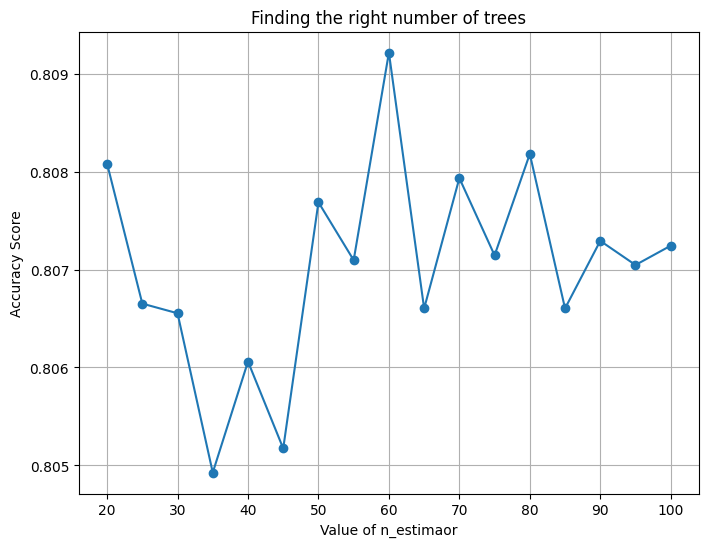

In [34]:
plt.figure(figsize=(8,6))
plt.plot(n_estimaor_options, ACC, marker = "o")
plt.xlabel("Value of n_estimaor")
plt.ylabel("Accuracy Score")
plt.title("Finding the right number of trees")
plt.grid()

In [36]:
ACC = []
max_features_options = ['auto', None,'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]
for trees in max_features_options:
    rf = RandomForestClassifier(max_features = trees,
                                n_estimators = 60,
                                random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    ACC.append(accuracy_score(y_val, y_pred))

ACC

[0.8092140921409214,
 0.8063562453806357,
 0.8092140921409214,
 0.8074895294407489,
 0.8100024636610003,
 0.8127617639812762,
 0.8092140921409214,
 0.8008869179600887]

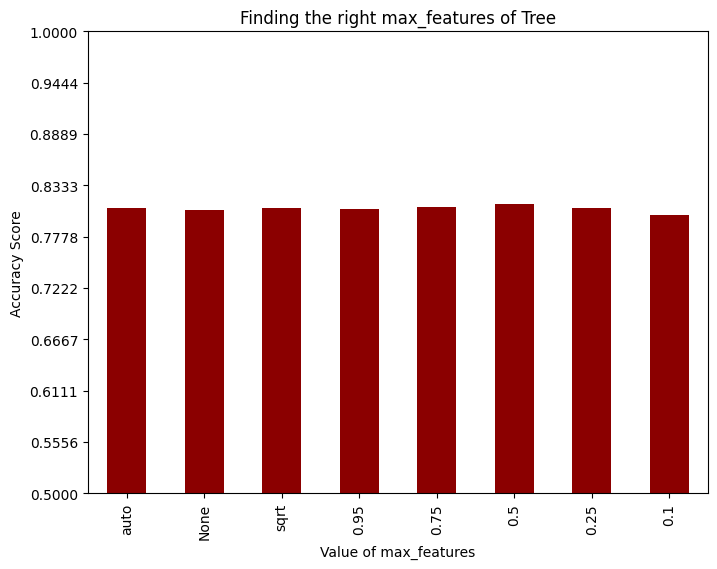

In [37]:
plt.figure(figsize=(8,6))
pd.Series(ACC, max_features_options).plot(kind="bar",color="darkred",ylim=(0.5,0.9))
plt.xlabel("Value of max_features")
plt.ylabel("Accuracy Score")
plt.yticks(np.linspace(0.5,1,10))
plt.title("Finding the right max_features of Tree")
plt.show()

In [38]:
print("The best max_features is:", max_features_options[np.argmax(ACC)])

The best max_features is: 0.5


In [42]:
ACC = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    rf = RandomForestClassifier(min_samples_leaf = trees,
                                max_features = 0.5,
                                n_estimators = 60,
                                random_state = 10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    ACC.append(accuracy_score(y_val, y_pred))

ACC

[0.8209411185020941,
 0.8178861788617886,
 0.8148312392214832,
 0.8111850209411186,
 0.8086228135008623,
 0.8070460704607046,
 0.8028578467602858,
 0.8011332840601133,
 0.8008376447400838,
 0.7974377925597438]

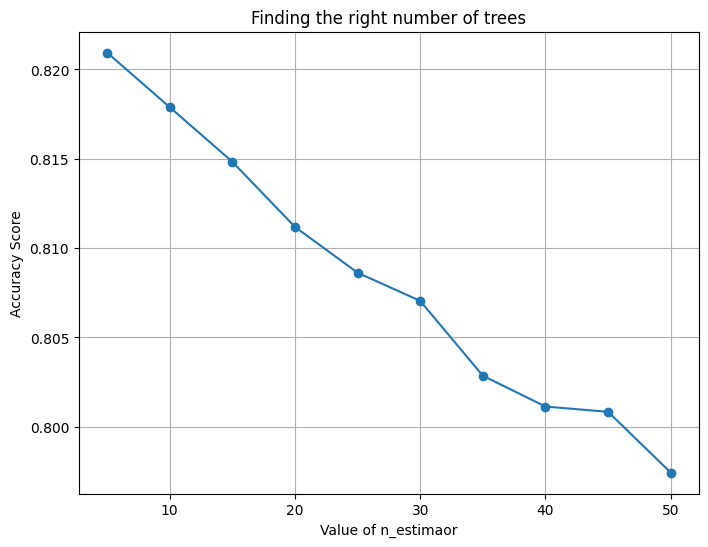

In [43]:
plt.figure(figsize=(8,6))
plt.plot(min_samples_leaf_options, ACC, marker = "o")
plt.xlabel("Value of n_estimaor")
plt.ylabel("Accuracy Score")
plt.title("Finding the right number of trees")
plt.grid()

In [45]:
print("The best min_samples_leaf is:", min_samples_leaf_options[np.argmax(ACC)])

The best min_samples_leaf is: 5


In [46]:
rf = RandomForestClassifier(min_samples_leaf = 5,
                            max_features = 0.5,
                            n_estimators = 60,
                            random_state = 0)
                            
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)

print("Best Random Forests accuracy is: ", acc_rf)

Best Random Forests accuracy is:  0.8216059602649006


In [52]:
rf = RandomForestClassifier(min_samples_leaf = 5,
                            max_features = 0.5,
                            n_estimators = 60,
                            random_state = 1)
rf.fit(X,y)
y_pred = rf.predict(X)
acc_rf = f1_score(y, y_pred)

print("Best Random Forests accuracy is: ", acc_rf)

Best Random Forests accuracy is:  0.4819383727721633


The confusion matrix:

[[0.98638765 0.01361235]
 [0.65942917 0.34057083]]


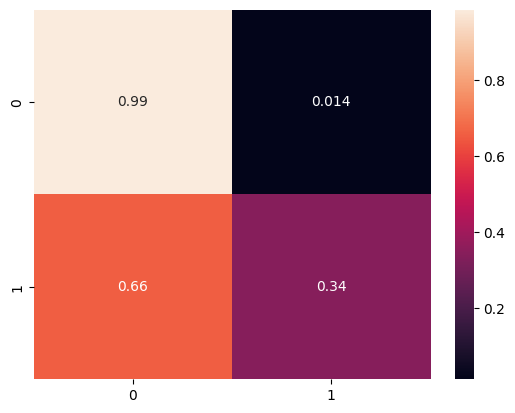

In [53]:
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [ ]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to tune
parameters = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
# Assuming you have trained a logistic regression model called 'model'

# Get the absolute coefficients
coefs = np.abs(model.coef_[0])

# Get the feature names
feature_names = ["feature1", "feature2", ...]  # Replace with your actual feature names

# Plot the feature importances
plt.barh(feature_names, coefs)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.show()